# For 1D MT, there are two hypothesis
- Plane electromagnetic wave
- The subground is a horizontal, layered and uniform structure.

How MT work?  
We only need the surface H and E components, and we can get $Z_0$ (impedance), but it has a relationship with the basement layer, including the depth and conductivity.  
So, no wonder, for a particular frequency, Z is a comprehensive response from the detection range of that frequency.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, pi
from typing import List

In [2]:
def MT1DForward(resistivity,h,f) -> List[np.ndarray]:
    """ 
    Caucluate the impedance(Z) and phase at given resisitvity and layer depth.

    Args:
        resistivity: each layer resitivity, the sequence is from top to bottom.
        h:  each layer depth.
        f: frequency, MT(1e-4 - 1e4)
    returns:
        [Z(f),Phase(f)]
    """
    rho = np.flip(resistivity).copy()
    h = np.flip(h).copy()
    j = complex(0,1)
    ApparentRho = np.zeros_like(f)
    Phase = np.zeros_like(f)
    for ind_1, freq in enumerate(f):
        omega = 2 * pi * freq
        for ind_2, ind_layer in enumerate(h):
            k  = np.sqrt(j * omega * mu_0 / rho[ind_2])
            Z0 = np.sqrt(j * omega * mu_0 * rho[ind_2])
            if ind_2 == 0:
                Z = Z0
                continue;
            R = (Z0 - Z) / (Z0 + Z)
            Q = np.exp(-2 * k * ind_layer)
            Z = Z0 * (1 - R*Q) / (1 + R*Q)
        
        rhofromZ = abs(Z)**2 / (omega * mu_0)
        phase = np.degrees(np.angle(Z))
        ApparentRho[ind_1] = rhofromZ
        Phase[ind_1] = phase
    
    return ApparentRho, Phase

In [3]:
def plot_mt(resistivity, h, f, rho, phase,):
     import matplotlib.gridspec as gridspec
     fig = plt.figure(figsize=(12,8))
     gs = gridspec.GridSpec(2, 2, figure=fig)
     
     depths = np.cumsum(np.r_[0, h[:-1], 2*h[-2]])
     ax1 = fig.add_subplot(gs[:,0])
     for ind in range(len(resistivity)):
          ax1.plot([resistivity[ind], resistivity[ind]],
                   [depths[ind], depths[ind+1]],
                   color='#8174A0',ls='-',lw=5
                   )
          if ind < len(resistivity) - 1:
               ax1.plot([resistivity[ind], resistivity[ind+1]],
                    [depths[ind+1], depths[ind+1]],
                    color='#8174A0',ls='-',lw=5
                    )      
     ax1.set_xscale('log')
     ax1.set_xlabel('Resistivity (Ω·m)')
     ax1.set_ylabel('Depth (m)')
     ax1.set_title('Resistivity vs Depth')
     ax1.invert_yaxis()  
     
     
     # plot apprho    
     ax2 = fig.add_subplot(gs[0,1])
     ax2.plot(f, rho, color='#F29F58', ls='-', marker='o')
     ax2.set_xscale('log')
     ax2.set_yscale('log')
     ax2.set_xlabel('frequency (Hz)')
     ax2.set_ylabel('Apparent Resistivity(Ω·m)')
     ax2.set_title('$Z_{xy}$ mode')

     # plot phase    
     ax2 = fig.add_subplot(gs[1,1])
     ax2.plot(f, phase, color='#8EB486', ls='-', marker='v')
     ax2.set_xscale('log')
     ax2.set_xlabel('frequency (Hz)')
     ax2.set_ylabel('Phase(deg)')

     plt.tight_layout()


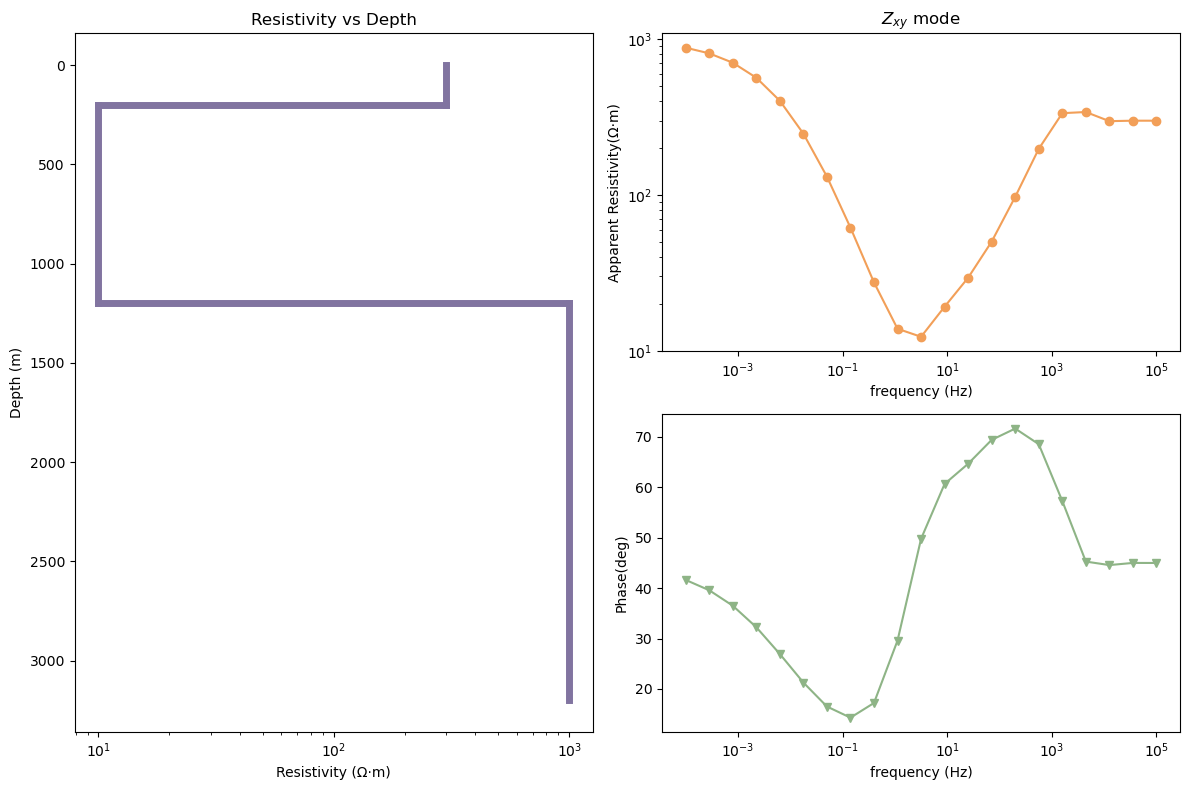

In [4]:
f = np.logspace(-4,5,num=21)
resistivity = np.array([300, 10, 1000])
h = [200, 1000, np.inf]
apprho,phase = MT1DForward(resistivity,h,f)

plot_mt(resistivity,h,f,apprho,phase)